# TODO Needs updated and converted to julia

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.integrate import quad

import lilguys as lguys
from lilguys import units as lu
import arya
from glob import glob as glob


In [19]:
out = lguys.Output("../models/twobody/out")

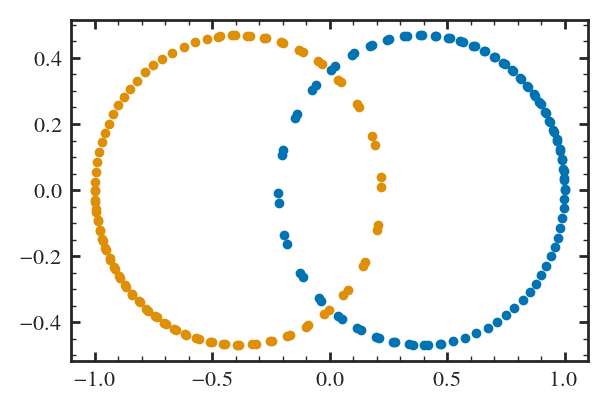

In [20]:
for i in range(2):
    plt.scatter(out.pos[:,i,0], out.pos[:,i,1])

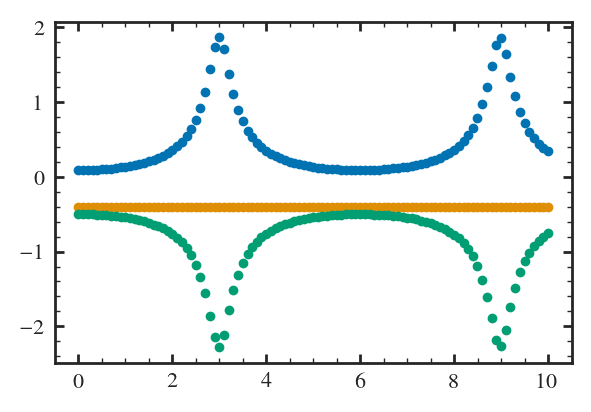

In [34]:
ke = np.sum(lguys.profile.get_KE(out), axis=-1)

te = lguys.profile.get_Etot(out)
ge = 0.5 * np.sum(out.potential, axis=-1)
plt.scatter(out.t, ke)
plt.scatter(out.t, te)
plt.scatter(out.t, ge)


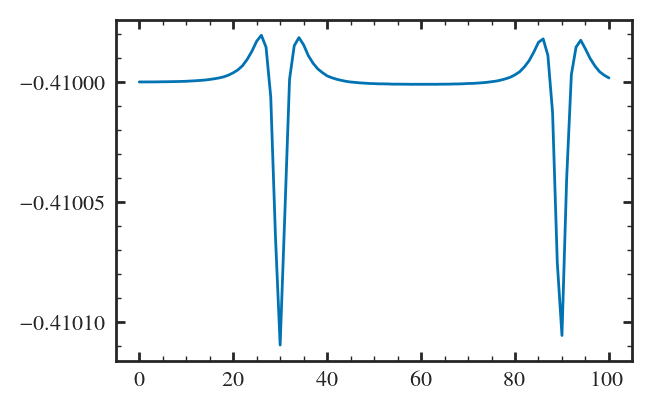

In [116]:
plt.plot(np.sum(te, axis=0))

Kepler's third law is 
$$
P^2 = \frac{4\pi^2}{\mu} a^3
$$ 
where $\mu = G(m+m)$. 

In [303]:
a = (np.max(out.pos[:, 0,0]) - np.min(out.pos[:, 0, 0]))

5.982699614608224

# Threebody

In [35]:
out = lguys.Output("../models/threebody/out")

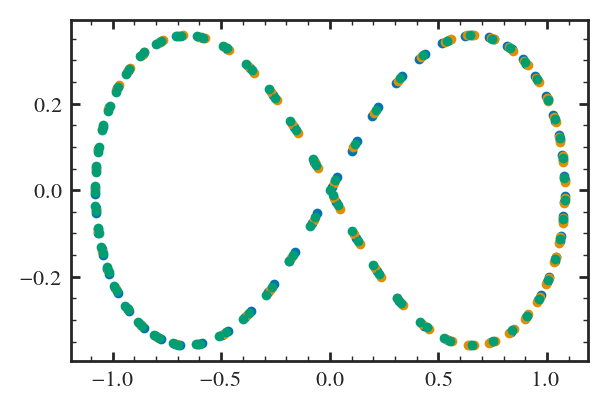

In [38]:
for i in range(3):
    plt.scatter(out.pos[:,i,0], out.pos[:,i,1])


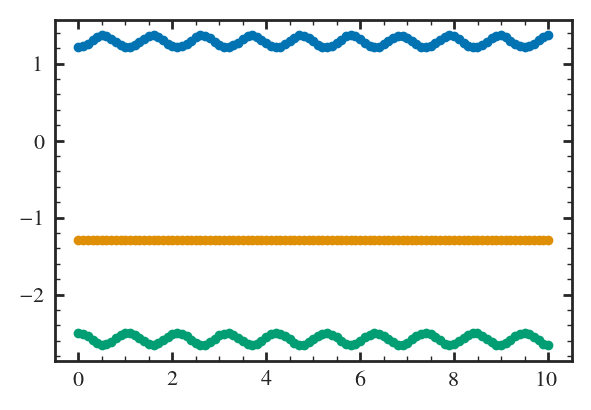

In [39]:
ke = np.sum(lguys.profile.get_KE(out), axis=-1)

te = lguys.profile.get_Etot(out)
ge = 0.5 * np.sum(out.potential, axis=-1)
plt.scatter(out.t, ke)
plt.scatter(out.t, te)
plt.scatter(out.t, ge)


In [47]:
out = lguys.Output("../mw_models/hernquist_test/out")

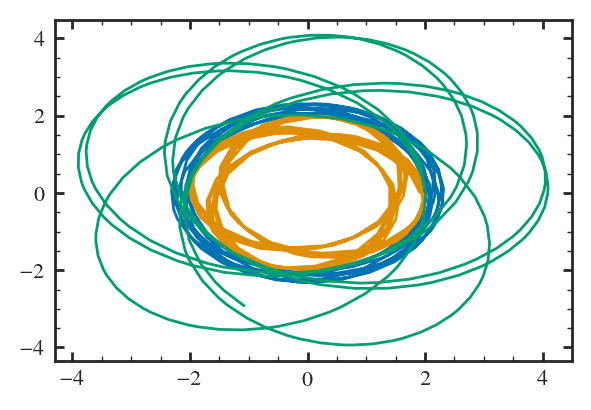

In [50]:
for i in range(out.pos.shape[1]):
    plt.plot(out.pos[:,i,0], out.pos[:,i,1])

In [84]:
r = np.sqrt(np.sum(out.pos[:, 0, :]**2, axis=-1))

In [117]:
out.t[np.argsort(r)]

array([  0.       ,  22.8515625, 114.2578125, 137.109375 , 159.9609375,
       182.8125   , 274.21875  , 297.0703125, 250.78125  , 227.9296875,
       205.078125 , 182.2265625,  90.8203125,  67.96875  ,  45.1171875,
        22.265625 ,  46.2890625,  69.140625 ,  91.9921875, 114.84375  ,
       206.25     , 229.1015625, 251.953125 , 274.8046875, 295.8984375,
       273.046875 , 250.1953125, 158.7890625, 135.9375   , 113.0859375,
        90.234375 ,   1.171875 ,  24.0234375,  46.875    ,  69.7265625,
       138.28125  , 161.1328125, 183.984375 , 206.8359375, 298.2421875,
       226.7578125, 203.90625  , 181.0546875, 158.203125 ,  66.796875 ,
        43.9453125,  21.09375  ,   1.7578125,  93.1640625, 116.015625 ,
       138.8671875, 161.71875  , 230.2734375, 253.125    , 275.9765625,
       298.828125 , 294.7265625, 271.875    , 249.0234375, 226.171875 ,
       134.765625 , 111.9140625,  89.0625   ,  66.2109375,  25.1953125,
        48.046875 ,  70.8984375,  93.75     , 185.15625  , 208.0

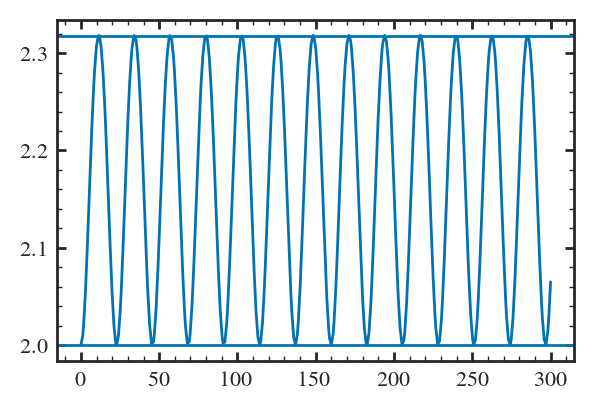

In [95]:
plt.plot(out.t, r)
plt.axhline(1.99966)
plt.axhline(2.318)

In [79]:
i = 0
L = np.mean(np.sqrt(np.sum(lguys.profile.get_L(out)[:, i]**2, axis=-1)))
E = np.mean(0.5 * out.v[:,i]**2 + out.ext_potential[:, i])

In [110]:
def Φ(r):
    return -1/(1 + r)

def f(r):
    return 1/r**2 + 2*(Φ(r) - E)/L**2

def  g(r):
    return 2 / np.sqrt(2*np.abs(E - Φ(r)) - L**2/r**2)

In [96]:
from scipy.optimize import root
from scipy.integrate import quad

/tmp/ipykernel_64369/4074566052.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 2 / np.sqrt(2*np.abs(E - Φ(r)) - L**2/r**2)


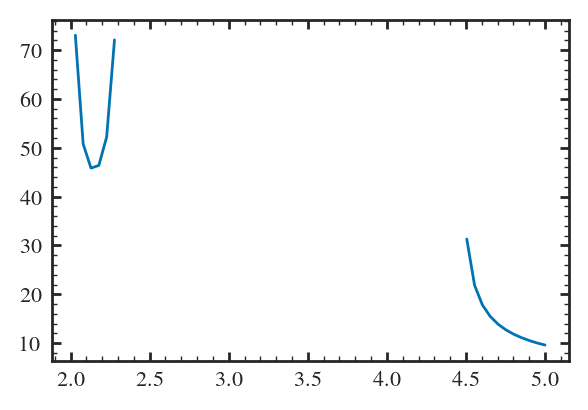

In [111]:
x = np.linspace(0.1, 5, 100)
plt.plot(x, g(x))


In [113]:
quad(g, 2, 2.317)

(21.43577116037065, 1.1871424811930908e-07)

In [93]:
root(f, 2)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([1.81871185e-11])
       r: array([0.02785491])
  status: 1
 success: True
       x: array([1.99966037])

In [94]:
root(f, 2.2)

    fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([4.21274127e-13])
       r: array([-0.0211071])
  status: 1
 success: True
       x: array([2.31819273])

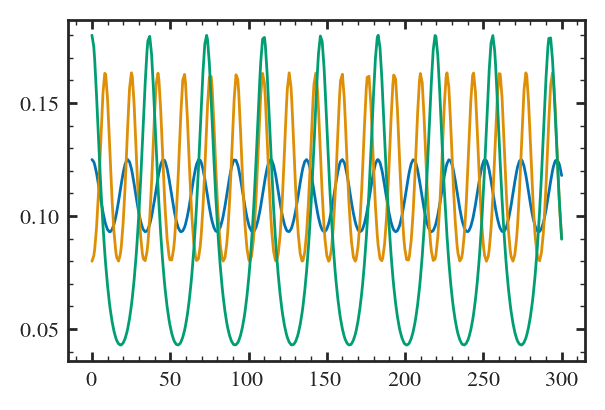

In [52]:
for i in range(3):
    plt.plot(out.t, lguys.profile.get_KE(out)[:, i])

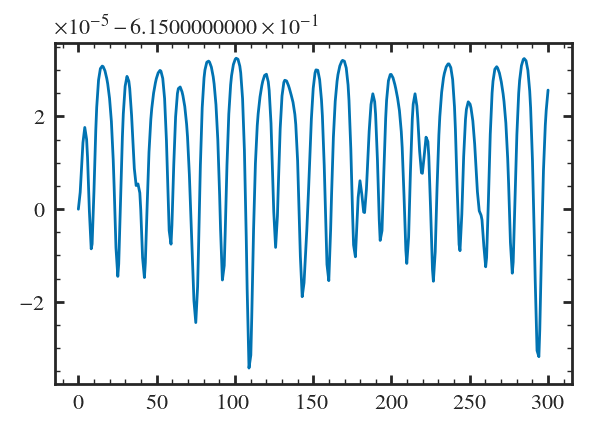

In [55]:
plt.plot(out.t, lguys.profile.get_Etot(out))

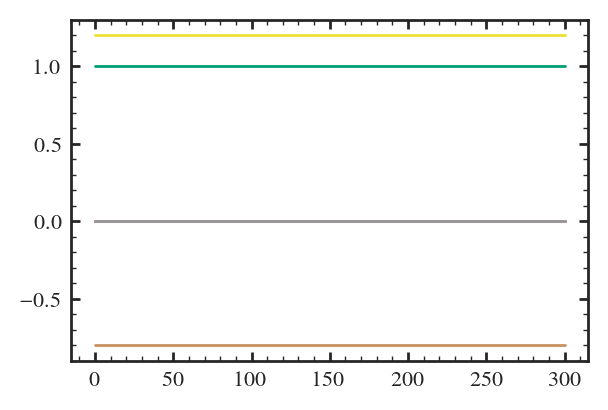

In [60]:
plt.plot(out.t, lguys.profile.get_L(out)[:, 0])
plt.plot(out.t, lguys.profile.get_L(out)[:, 1])
plt.plot(out.t, lguys.profile.get_L(out)[:, 2])

In [102]:
out = lguys.Output("../mw_models/nfw_test/out")

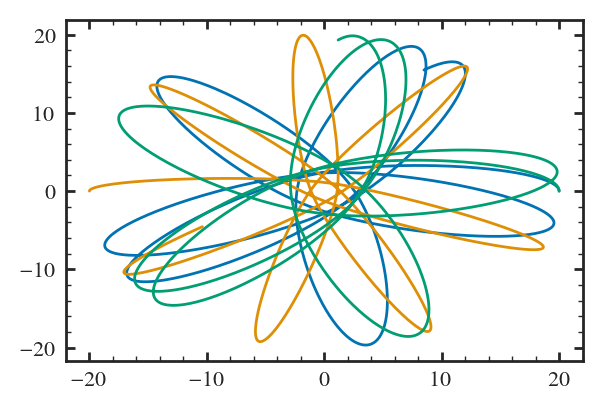

In [103]:
for i in range(out.pos.shape[0]):
    plt.plot(out.pos[i,:,0], out.pos[i,:,1])

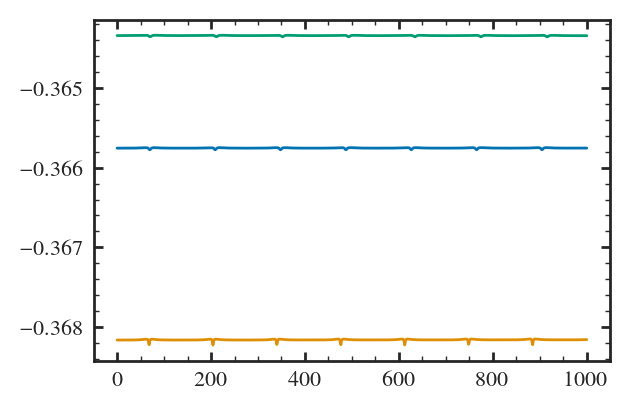

In [104]:
for i in range(3):
    plt.plot(out.t, lguys.profile.get_energy(out)[i])

In [165]:
out = lguys.Output("../mw_models/disk_test/out")

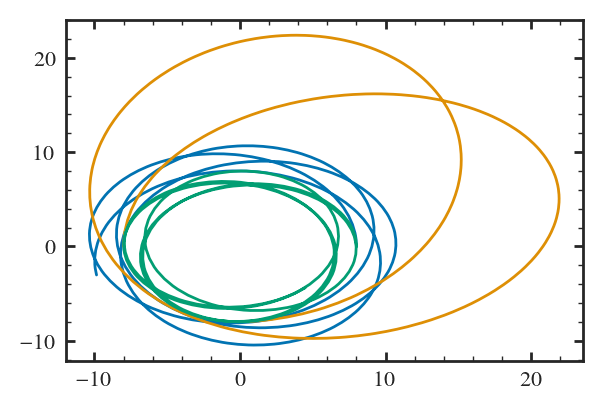

In [166]:
for i in range(out.pos.shape[0]):
    plt.plot(out.pos[i,:,0], out.pos[i,:,1])

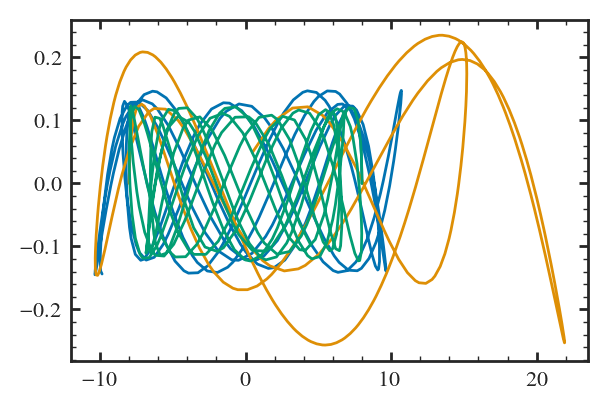

In [167]:
for i in range(out.pos.shape[0]):
    plt.plot(out.pos[i,:,0], out.pos[i,:,2])

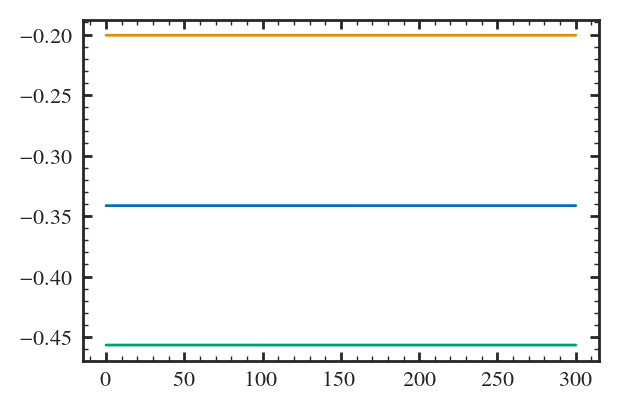

In [168]:
for i in range(3):
    plt.plot(out.t, lguys.profile.get_energy(out)[i])